In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data/encoded/final_matches_df.csv')

In [2]:
df.head()

,HT_Code,AT_Code,FT_Result_code,HT_Form,AT_Form,FT_HT_Goals,FT_AT_Goals,HT_HT_Goals,HT_AT_Goals,HT_Shots,...,5GAV_AT_Reds,HT_Result_code,AVG_Influence_HT,AVG_ICT_Index_HT,Injured_Players_HT,AVG_Influence_AT,AVG_ICT_Index_AT,Injured_Players_AT,HT_Players_Performances,AT_Players_Performances
0,1,8,1,10,10,3,0,3,0,14,...,0.0,1,11.071795,3.556410,2.0,10.702222,3.033333,0.0,5.314103,6.867778
1,19,15,1,9,7,4,1,4,0,16,...,0.2,1,9.831111,2.088889,3.0,11.583333,3.019444,1.0,2.960000,6.301389
2,28,18,0,4,15,1,3,1,1,13,...,0.0,0,10.733333,1.933333,1.0,17.712821,4.689744,1.0,5.333333,10.201282
3,27,9,0,1,7,2,3,1,0,11,...,0.0,1,20.600000,3.100000,5.0,19.953333,4.530000,2.0,6.850000,10.241667
4,26,31,0,1,7,1,1,0,0,12,...,0.0,0,3.533333,1.106667,1.0,13.425000,2.491667,1.0,1.320000,6.958333


In [3]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

In [4]:
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

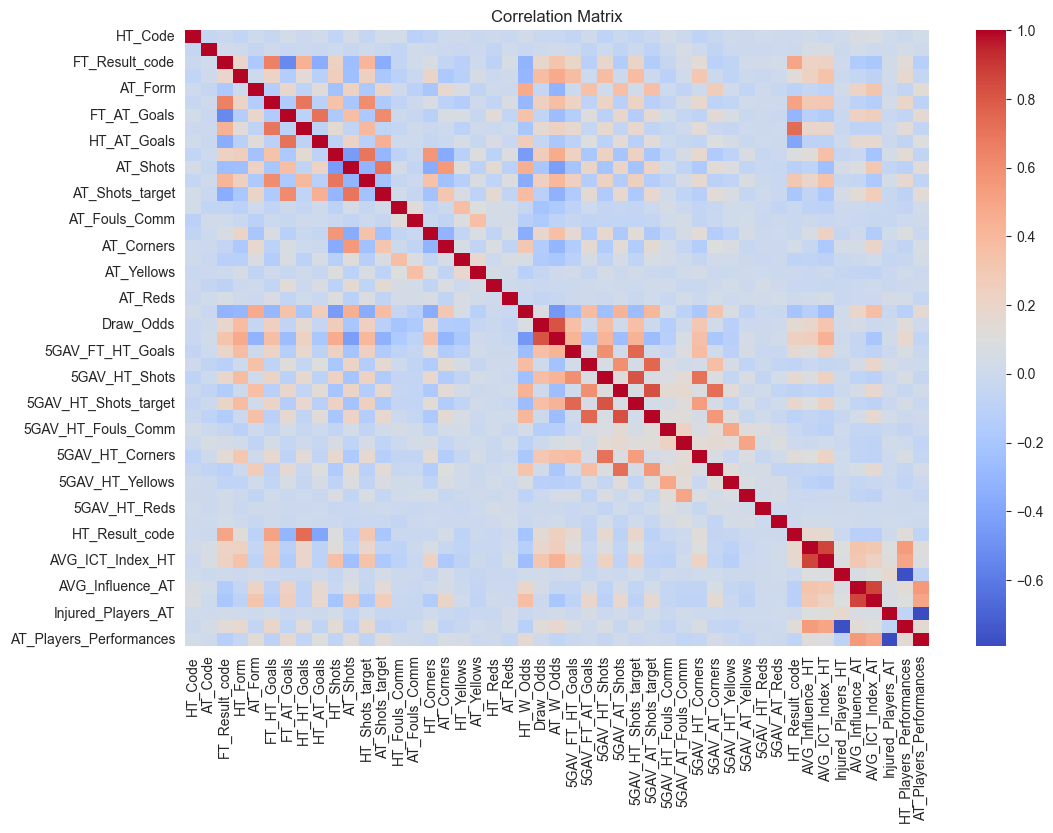

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

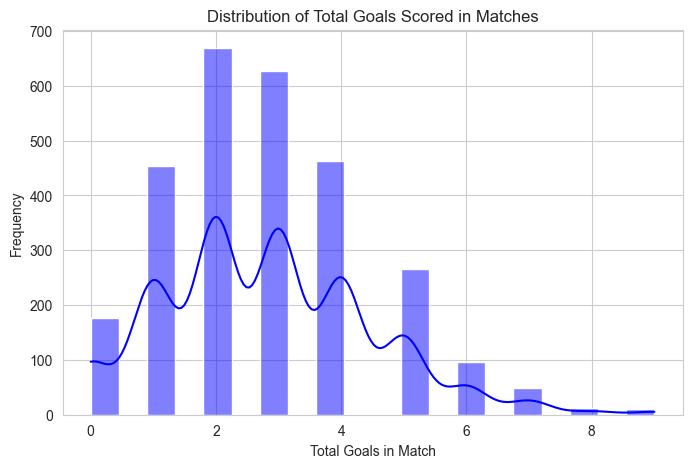

In [6]:
# Histogram of total goals scored
plt.figure(figsize=(8, 5))
sns.histplot(df["FT_HT_Goals"] + df["FT_AT_Goals"], bins=20, kde=True, color="blue")
plt.xlabel("Total Goals in Match")
plt.ylabel("Frequency")
plt.title("Distribution of Total Goals Scored in Matches")
plt.show()


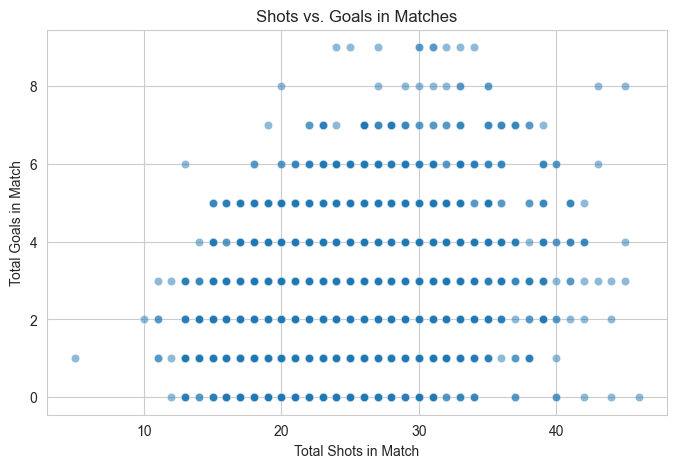

In [7]:
# Scatter plot: Shots vs. Goals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["HT_Shots"] + df["AT_Shots"], y=df["FT_HT_Goals"] + df["FT_AT_Goals"], alpha=0.5)
plt.xlabel("Total Shots in Match")
plt.ylabel("Total Goals in Match")
plt.title("Shots vs. Goals in Matches")
plt.show()

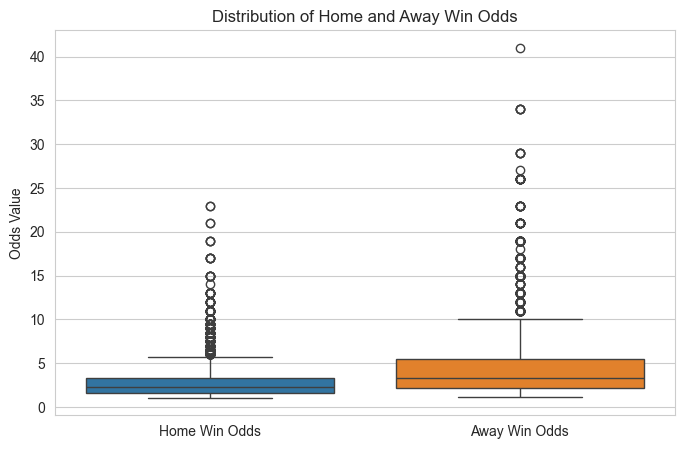

In [8]:
# Boxplot of Home vs. Away Win Odds
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["HT_W_Odds", "AT_W_Odds"]])
plt.ylabel("Odds Value")
plt.title("Distribution of Home and Away Win Odds")
plt.xticks(ticks=[0, 1], labels=["Home Win Odds", "Away Win Odds"])
plt.show()

In [9]:
normalized_df.to_csv('data/normalized/normalized_matches_df.csv', index=False)